<a href="https://www.kaggle.com/code/anikchand/delivery-duration-prediction-doordash?scriptVersionId=247132207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/historical-data/historical_data.csv


In [70]:
df = pd.read_csv('/kaggle/input/historical-data/historical_data.csv')

In [71]:
df.shape

(197428, 16)

In [72]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

## Feature Engineering

In [73]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

In [74]:
df['order_hour'] = df['created_at'].dt.hour  # Time of day
df['order_dayofweek'] = df['created_at'].dt.dayofweek  # Day of the week

# Ratio of busy dashers to total available (workload indicator)
df['busy_dasher_ratio'] = df['total_busy_dashers'] / df['total_onshift_dashers'].replace(0, np.nan)

# Average price per item
df['avg_item_price'] = df['subtotal'] / df['total_items'].replace(0, np.nan)

In [75]:
df.shape

(197428, 21)

In [76]:
numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_df.corr()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,busy_dasher_ratio,avg_item_price
market_id,1.000000,0.017301,-0.021895,-0.006855,-0.016237,0.002557,-0.000150,-0.004921,0.069752,0.060488,0.063754,-0.053241,0.006597,-0.005784,-0.043346,-0.007323
store_id,0.017301,1.000000,0.019554,-0.008796,-0.013370,-0.012727,-0.009128,-0.018661,-0.023141,-0.023245,-0.020348,0.017469,0.001953,-0.000414,0.005087,-0.011106
order_protocol,-0.021895,0.019554,1.000000,0.008790,-0.053623,-0.023342,-0.045421,-0.090960,0.145022,0.149584,0.134895,-0.678222,-0.008326,-0.006660,0.017486,-0.056096
total_items,-0.006855,-0.008796,0.008790,1.000000,0.558067,0.763912,-0.393149,-0.058233,0.031732,0.028602,0.034380,-0.023643,0.004692,0.004905,-0.004742,-0.315521
subtotal,-0.016237,-0.013370,-0.053623,0.558067,1.000000,0.681101,0.037038,0.505547,0.130831,0.125566,0.130106,0.039043,0.034665,0.011200,-0.004626,0.284643
num_distinct_items,0.002557,-0.012727,-0.023342,0.763912,0.681101,1.000000,-0.448739,0.041871,0.065943,0.060638,0.067800,0.003507,0.022693,0.006741,-0.006348,-0.293897
min_item_price,-0.000150,-0.009128,-0.045421,-0.393149,0.037038,-0.448739,1.000000,0.545484,0.042368,0.043881,0.041002,0.053073,0.003373,0.004762,0.001789,0.861796
max_item_price,-0.004921,-0.018661,-0.090960,-0.058233,0.505547,0.041871,0.545484,1.000000,0.133113,0.131005,0.130676,0.085287,0.026591,0.009409,0.003338,0.771875
total_onshift_dashers,0.069752,-0.023141,0.145022,0.031732,0.130831,0.065943,0.042368,0.133113,1.000000,0.943789,0.936122,-0.185650,0.045925,0.046972,-0.060013,0.092917
total_busy_dashers,0.060488,-0.023245,0.149584,0.028602,0.125566,0.060638,0.043881,0.131005,0.943789,1.000000,0.932913,-0.191811,0.044504,0.060641,0.117269,0.092234


In [77]:
df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

In [78]:
# applying ANOVA f test for find out the importance of categorical col

# Drop any rows where the target is NaN
mask = df['delivery_duration'].notnull()
X_cat = df.loc[mask, ['store_primary_category']]
y = df.loc[mask, 'delivery_duration']

# One Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_regression

encoder = OneHotEncoder(sparse=False, drop='first')
X_cat_encoded = encoder.fit_transform(X_cat)

# Perform F-test
f_values, p_values = f_regression(X_cat_encoded, y)

print("F-values:", f_values)
print("P-values:", p_values)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


F-values: [5.32669823e-04 2.24265908e-01 5.13092673e-05 1.06274710e-01
 5.27665785e-04 3.47564047e-02 2.11041085e-02 8.27910943e-04
 1.70121090e-01 6.58008161e-01 1.13250143e-04 7.25284864e-03
 1.89581143e-01 8.03706124e-02 1.51244643e-01 5.00425625e-02
 1.43477016e-01 3.20957028e-06 1.93045778e-04 1.56661104e-02
 2.00131711e-03 1.78589397e-03 1.40999598e-02 9.17986399e-03
 9.15853024e-03 1.62293182e-03 1.01500473e-05 1.58927965e+00
 6.14691080e-03 3.86658159e-02 1.25787967e-02 2.54261363e-03
 2.50605865e-02 2.82838135e-02 1.45450204e-01 1.18246217e-01
 1.16074274e-03 1.05062058e-06 3.42532995e+01 1.22132193e+00
 7.63937530e-04 2.36094975e-02 1.98963762e-03 6.51708084e-04
 1.44923197e-02 1.31038384e-01 2.80627754e+00 3.01742424e-03
 5.91658382e-04 1.25321112e-06 2.17829993e-01 1.01006117e-03
 6.86607953e-03 4.17612176e-02 5.54588579e-03 1.06306807e+00
 1.70618766e-03 1.07697148e-01 1.42048461e+00 2.73130758e-02
 9.25045567e-04 2.32724874e-01 1.03821400e-03 1.03110300e-02
 2.14023204e-0

In [79]:
# find out the category with the most importance (4.84615298e-09)

encoder = OneHotEncoder(sparse=False, drop='first')
X_cat_encoded = encoder.fit_transform(X_cat)

# Get the names of the columns
category_names = encoder.get_feature_names_out(X_cat.columns)

# Find the index of the significant p-value
significant_index = (p_values < 0.05).nonzero()[0]

# Print the actual category name
for idx in significant_index:
    print(f"Index {idx} -> {category_names[idx]}")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index 38 -> store_primary_category_italian


In [80]:
# finding out feature importance of datetime cols

df[['order_hour','order_dayofweek','delivery_duration']].corr()

,order_hour,order_dayofweek,delivery_duration
order_hour,1.000000,0.018919,-0.010527
order_dayofweek,0.018919,1.000000,0.002857
delivery_duration,-0.010527,0.002857,1.000000


In [81]:
# making the dataset after fetaure engineering ...

numerical_cols1 = ['subtotal', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration', 'busy_dasher_ratio']
categorical_cols = ['store_primary_category']
numerical_cols2 = ['delivery_duration']

encoder1 = OneHotEncoder(sparse=False, drop='first')

encoder1.fit_transform(df[categorical_cols])
onehot_array = encoder1.fit_transform(df[categorical_cols])

# Get the column names
onehot_columns = encoder1.get_feature_names_out(categorical_cols)

onehot_df = pd.DataFrame(onehot_array, columns=onehot_columns, index=df.index)

onehot_df

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,store_primary_category_breakfast,...,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,store_primary_category_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
final_df = pd.concat(
    [
        df[numerical_cols1],                         
        onehot_df[['store_primary_category_italian']],  
        df[numerical_cols2]                          
    ],
    axis=1
)

final_df

,subtotal,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,busy_dasher_ratio,store_primary_category_italian,delivery_duration
0,3441,14.0,21.0,861.0,0.424242,0.0,3779.0
1,1900,2.0,2.0,690.0,2.000000,0.0,4024.0
2,1900,0.0,0.0,690.0,0.000000,0.0,1781.0
3,6900,1.0,2.0,289.0,1.000000,0.0,3075.0
4,3900,6.0,9.0,650.0,1.000000,0.0,2390.0
...,...,...,...,...,...,...,...
197423,1389,17.0,23.0,331.0,1.000000,0.0,3907.0
197424,3010,11.0,14.0,915.0,0.916667,0.0,3383.0
197425,1836,41.0,40.0,795.0,1.051282,0.0,3008.0
197426,1175,7.0,12.0,384.0,1.000000,0.0,3907.0


In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Handling null values

In [84]:
# find out percentage of null values

(final_df.isnull().sum() / len(final_df)) * 100

subtotal                                         0.000000
total_busy_dashers                               8.236927
total_outstanding_orders                         8.236927
estimated_store_to_consumer_driving_duration     0.266426
busy_dasher_ratio                               10.067974
store_primary_category_italian                   0.000000
delivery_duration                                0.003546
dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


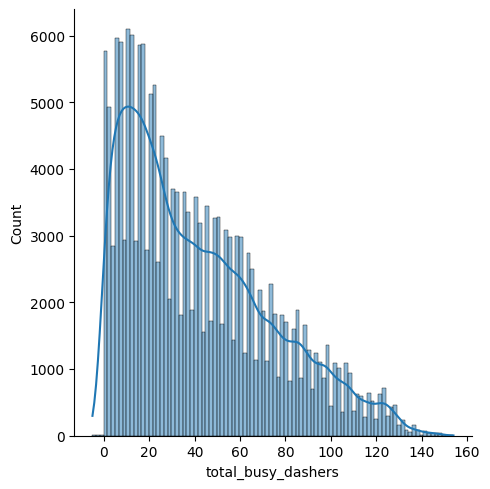

In [85]:
sns.displot(final_df['total_busy_dashers'].dropna(), kde=True) 
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


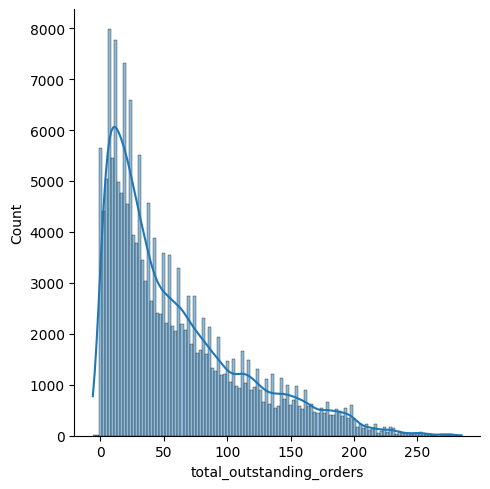

In [86]:
sns.displot(final_df['total_outstanding_orders'].dropna(), kde=True) 
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


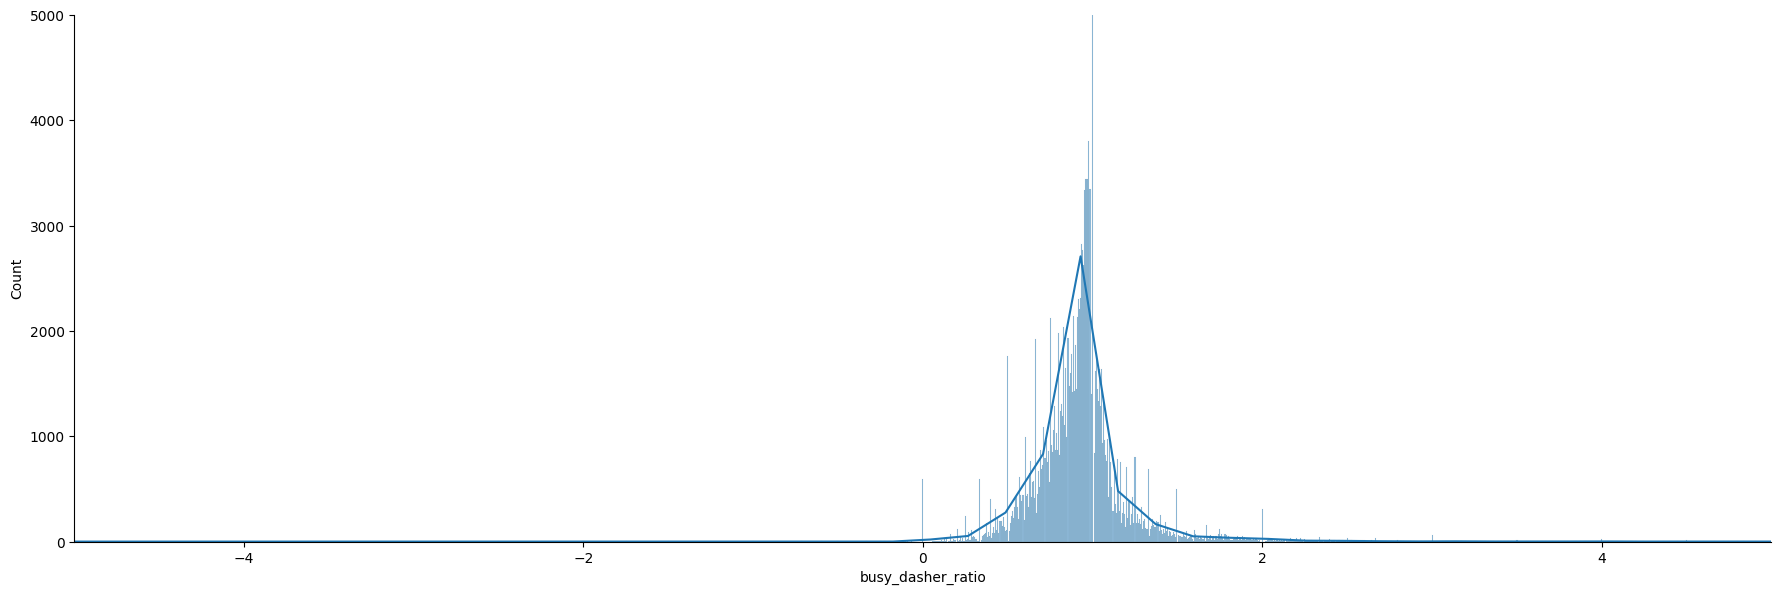

In [87]:
sns.displot(final_df["busy_dasher_ratio"].dropna(), kde=True, height=6, aspect=3)
plt.ylim(0, 5000)
plt.xlim(-5, 5)
plt.show()

In [88]:
# impute mean values to the >5% nan and for <5% remove the nan values

from sklearn.impute import SimpleImputer

s1 = SimpleImputer(strategy='mean')

final_df['total_busy_dashers'] = s1.fit_transform(final_df[['total_busy_dashers']])
final_df['total_outstanding_orders'] = s1.fit_transform(final_df[['total_outstanding_orders']])
final_df['busy_dasher_ratio'] = s1.fit_transform(final_df[['busy_dasher_ratio']])

final_df.dropna(subset=[
    'estimated_store_to_consumer_driving_duration',
    'delivery_duration'
], inplace=True)

In [89]:
final_df.isnull().sum()

subtotal                                        0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
busy_dasher_ratio                               0
store_primary_category_italian                  0
delivery_duration                               0
dtype: int64

In [90]:
# standardize the numerical cols

numerical_columns = [
    'subtotal',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_store_to_consumer_driving_duration',
    'delivery_duration',
    'busy_dasher_ratio'
]

sclr = StandardScaler()

final_df[numerical_columns] = sclr.fit_transform(final_df[numerical_columns])

## work on outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea55cba9a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea55cb7a110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea55f42c410>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea55cbfe790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea55f3af210>],
 'means': []}

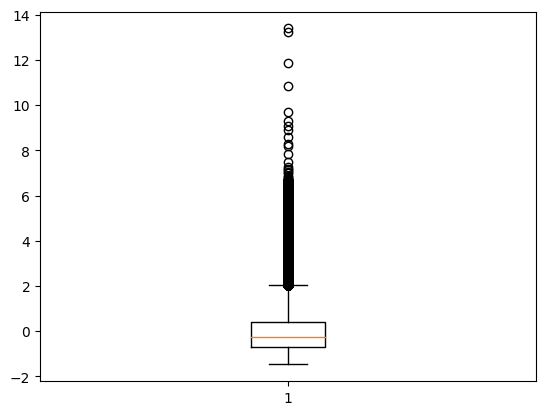

In [91]:
plt.boxplot(final_df['subtotal'])

In [92]:
final_df = final_df[final_df['subtotal'] <= 10]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea55cc00650>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea55cc01990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea55cc47f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea55cc02990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea55cc3f0d0>],
 'means': []}

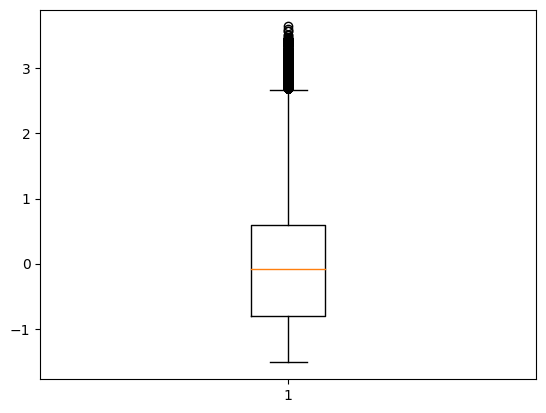

In [93]:
plt.boxplot(final_df['total_busy_dashers'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea55cc35690>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea55cc36910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea55cb8e090>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea55cc37890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea55b16ff50>],
 'means': []}

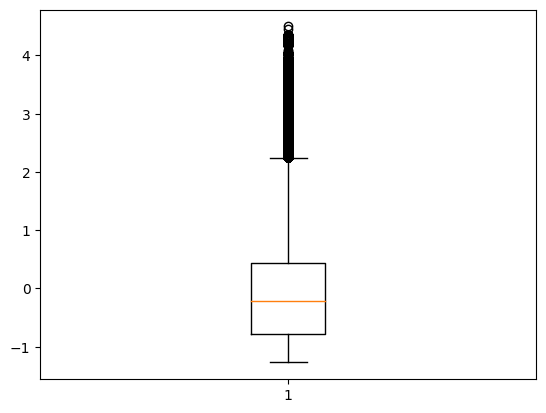

In [94]:
plt.boxplot(final_df['total_outstanding_orders'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea55b434f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea55b436310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea55b434610>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea55b437390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea55b434ed0>],
 'means': []}

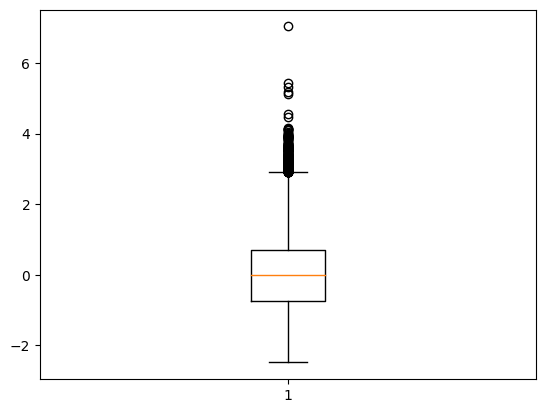

In [95]:
plt.boxplot(final_df['estimated_store_to_consumer_driving_duration'])

In [96]:
((final_df['estimated_store_to_consumer_driving_duration'] > 4.23).sum() * 100) / len(final_df)

0.0035552666196017086

In [97]:
final_df = final_df[final_df['estimated_store_to_consumer_driving_duration'] <= 4.23]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea55b39d510>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea55b39e950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea55b39cc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea55b39efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea55b3bca50>],
 'means': []}

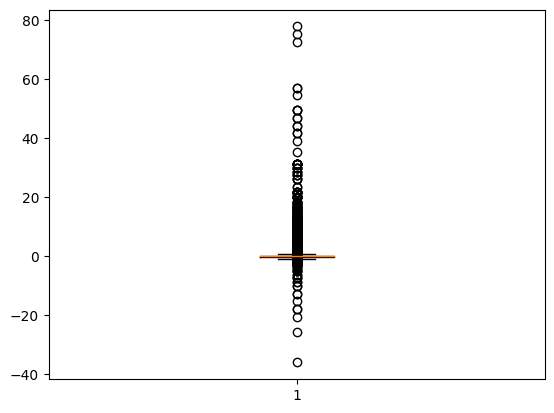

In [98]:
plt.boxplot(final_df['busy_dasher_ratio'])

In [99]:
# remove outliers using IQR method

Q1 = final_df['busy_dasher_ratio'].quantile(0.17)
Q3 = final_df['busy_dasher_ratio'].quantile(0.83)

IQR = Q3 - Q1

# find limits
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

final_df_iqr = final_df[(final_df['busy_dasher_ratio'] >= lb) &
                        (final_df['busy_dasher_ratio'] <= ub)]

# compare outlier counts
outliers_count = len(final_df) - len(final_df_iqr)

(outliers_count * 100) / len(final_df)

4.501127567501676

In [100]:
final_df = final_df[(final_df['busy_dasher_ratio'] >= lb) &
                        (final_df['busy_dasher_ratio'] <= ub)]

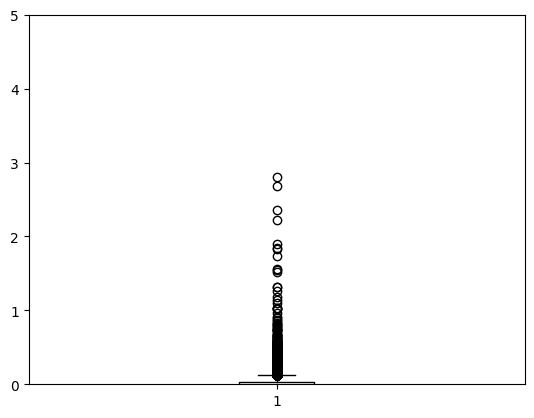

In [101]:
plt.boxplot(final_df['delivery_duration'])
plt.ylim(0, 5)
plt.show()

In [102]:
final_df = final_df[final_df['delivery_duration'] <= 5]

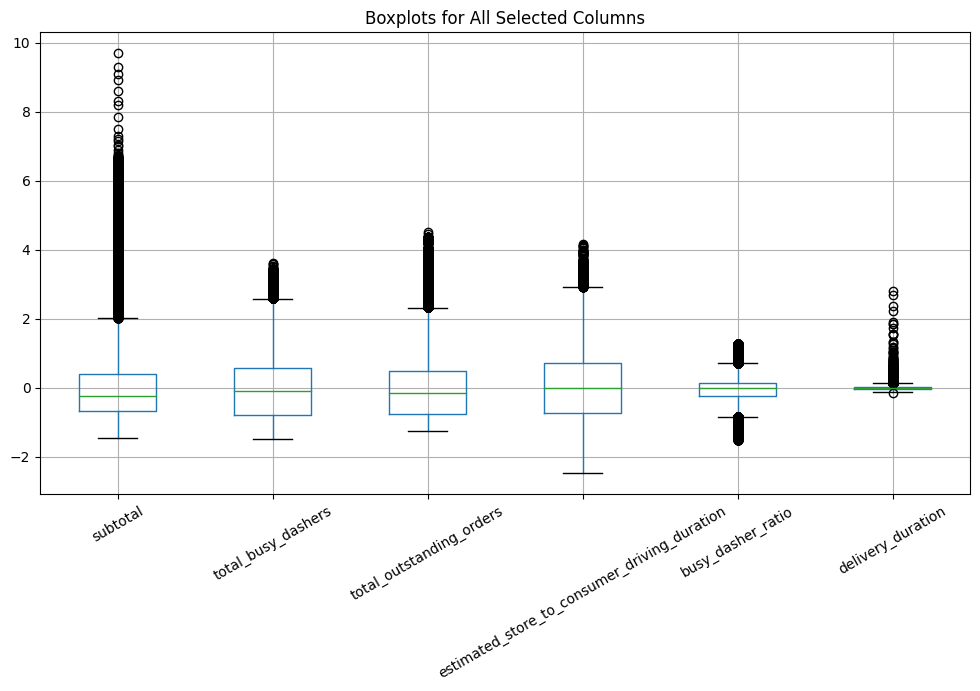

In [103]:
columns = [
    'subtotal',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_store_to_consumer_driving_duration',
    'busy_dasher_ratio',
    'delivery_duration'
]

plt.figure(figsize=(12, 6))
final_df.boxplot(column=columns)
plt.xticks(rotation=30)
plt.title('Boxplots for All Selected Columns')
plt.show()

In [104]:
final_df.isnull().sum()

subtotal                                        0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
busy_dasher_ratio                               0
store_primary_category_italian                  0
delivery_duration                               0
dtype: int64

In [105]:
final_df.shape

(188019, 7)

## visualize the columns with scatterplot

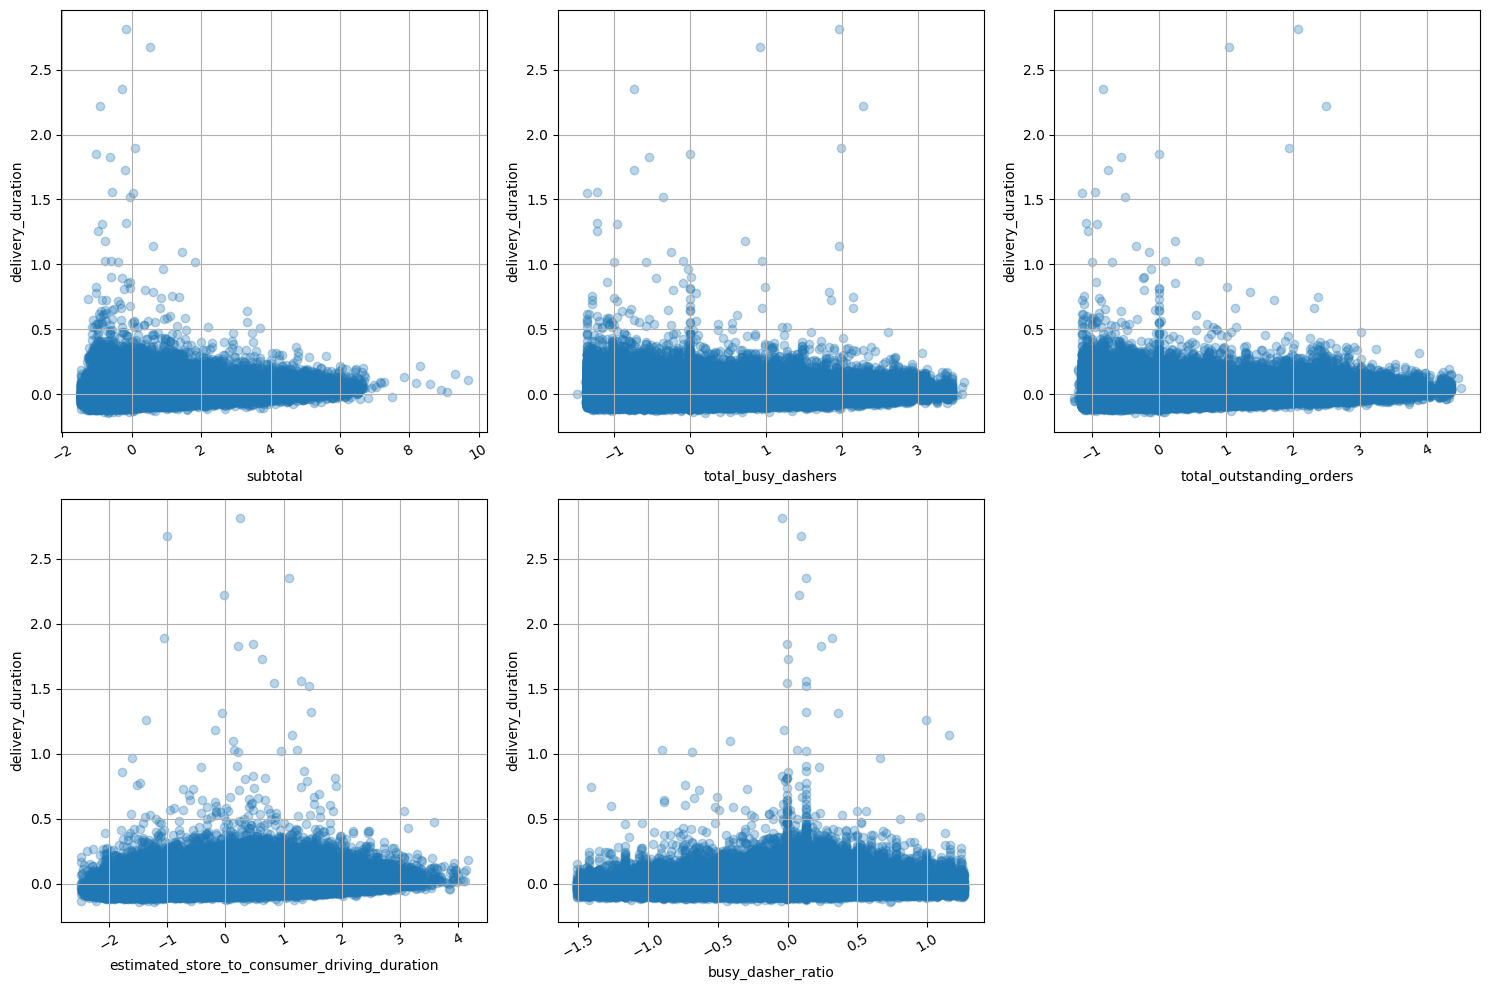

In [106]:
columns = [
    'subtotal',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_store_to_consumer_driving_duration',
    'busy_dasher_ratio',
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    plt.scatter(final_df[col], final_df['delivery_duration'], alpha=0.3)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('delivery_duration', fontsize=10)
    plt.xticks(rotation=30)
    plt.grid(True)

plt.tight_layout()
plt.show()

## define input and output matrix and train test split

In [107]:
X = final_df.drop(columns=['delivery_duration'])
y = final_df['delivery_duration']

In [108]:
y.isnull().sum()

0

In [109]:
X.isnull().sum()

subtotal                                        0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
busy_dasher_ratio                               0
store_primary_category_italian                  0
dtype: int64

In [110]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## model training

In [111]:
# using polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# STEP 1: Create a pipeline
model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('regressor', LinearRegression())])

In [120]:
model.predict([['-0.484375',	'-0.641247', '-0.853455', '-1.168694', '0.253354', '0.0']])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([-0.05121021])

In [118]:
X_train.head()

,subtotal,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,busy_dasher_ratio,store_primary_category_italian
28875,-0.484375,-0.641247,-0.853455,-1.168694,0.253354,0.0
148471,-0.814095,-0.000464,-0.000402,0.668523,-0.000398,0.0
43283,1.811590,-1.160631,-0.992162,0.486169,0.129855,0.0
135482,0.404385,0.494908,0.949743,-0.124717,0.129855,0.0
4421,-0.904068,-0.836016,-0.675116,-0.731044,0.129855,0.0


In [115]:
y_train.head()

28875    -0.072754
148471    0.013976
43283     0.018910
135482    0.060405
4421     -0.003838
Name: delivery_duration, dtype: float64

In [112]:
y_pred = model.predict(X_test)

In [53]:
r2_score(y_test, y_pred)

0.228892411465351

In [54]:
mean_absolute_error(y_test, y_pred)

0.03634933201453996

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
y_pred = rf.predict(X_test)

In [57]:
r2_score(y_test, y_pred)

0.16918415768443007

In [58]:
mean_absolute_error(y_test, y_pred)

0.03804980329707116